## Cardiotocographic Dataset - Exploratory Data Analysis (EDA)
Steps included:
- Data Cleaning & Preparation
- Statistical Summary
- Visualizations
- Pattern Recognition
- Conclusion

In [30]:
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [31]:
# Step 1: Load the dataset
df=pd.read_csv("Cardiotocographic.csv")
print('Initial shape:',df.shape)
df.head()

Initial shape: (2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [33]:
df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [34]:
df[df.isna().any(axis=1)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
50,NaN,NaN,0.000000,0.008086,0.000000,NaN,NaN,29.000000,1.300000,0.000000,NaN,NaN,NaN,NaN
116,NaN,0.038567,0.000000,0.006993,0.002331,NaN,NaN,26.000000,4.300000,0.532872,NaN,NaN,NaN,NaN
126,NaN,NaN,0.000000,0.004380,0.000000,NaN,NaN,69.000000,0.300000,21.000000,NaN,NaN,NaN,NaN
201,NaN,NaN,0.016393,0.000000,0.000000,NaN,NaN,56.000000,0.500000,12.000000,NaN,NaN,NaN,NaN
566,NaN,NaN,0.000000,0.004115,0.005487,NaN,NaN,43.000000,2.500000,0.000000,NaN,NaN,NaN,NaN
574,NaN,NaN,0.000000,0.002611,0.002611,NaN,NaN,34.000000,4.900000,0.000000,NaN,NaN,NaN,NaN
603,NaN,NaN,0.006519,0.001304,0.001304,NaN,NaN,73.000000,0.700000,0.000000,NaN,NaN,NaN,NaN
935,NaN,NaN,0.000000,0.005495,0.001374,NaN,NaN,30.000000,1.251793,0.000000,NaN,NaN,NaN,NaN
936,NaN,NaN,0.000000,0.007802,0.000000,NaN,NaN,33.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
1013,NaN,NaN,0.000000,0.003861,0.000000,NaN,NaN,34.000000,1.000000,0.000000,NaN,NaN,NaN,NaN


In [35]:
#Data Cleaning
#Handle missing values
numeric_cols=df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    if df[col].isna().sum()>0:
        df[col]=df[col].fillna(df[col].median())

print('Shape after handling missing values:', df.shape)

Shape after handling missing values: (2126, 14)


In [36]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [37]:
#Step 2:Statistical Summary
summary=df[numeric_cols].describe().T
summary['median']=df[numeric_cols].median().values
summary['IQR']=(df[numeric_cols].quantile(0.75)-df[numeric_cols].quantile(0.25)).values
summary

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2126.0,133.340204,11.214379,51.842487,126.000000,133.000000,140.000000,214.000000,133.000000,14.000000
AC,2126.0,0.003204,0.004373,-0.019284,0.000000,0.001634,0.005606,0.038567,0.001634,0.005606
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268,0.000000,0.002567
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002,0.004484,0.004685
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769,0.000000,0.003289
DS,2126.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000,0.000000
DP,2126.0,0.000173,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000,0.000000
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000,49.000000,29.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000,1.200000,1.000000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000,0.000000,11.000000


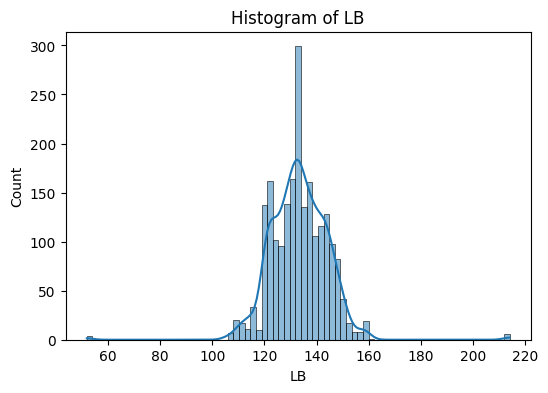

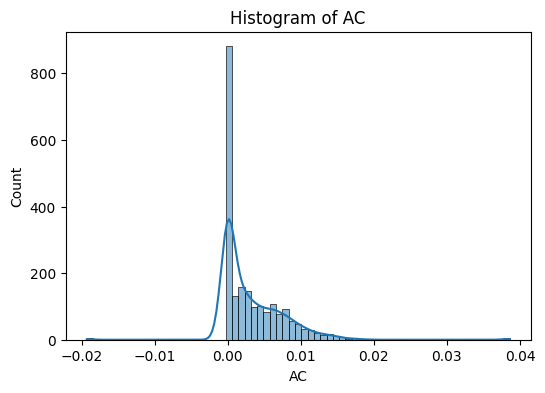

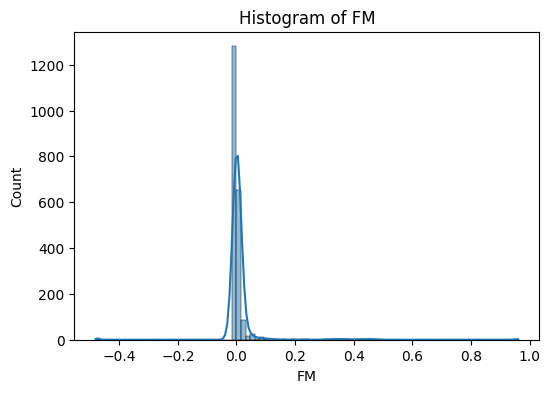

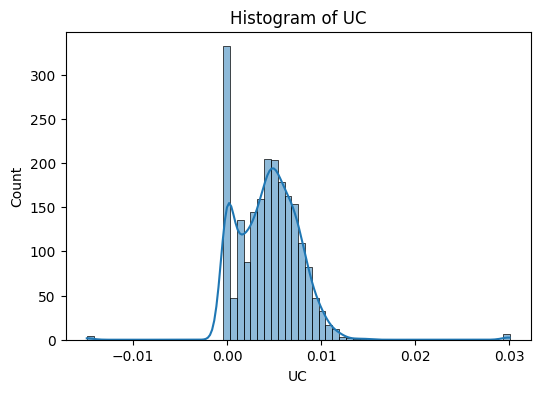

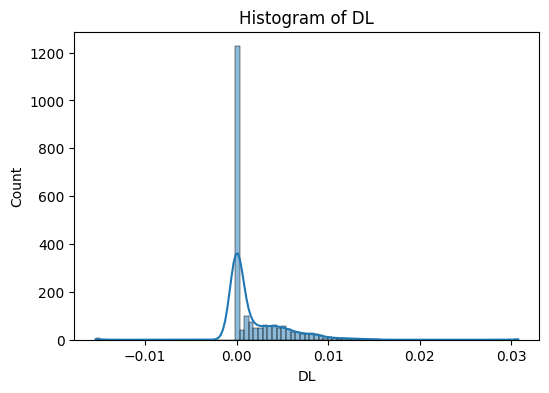

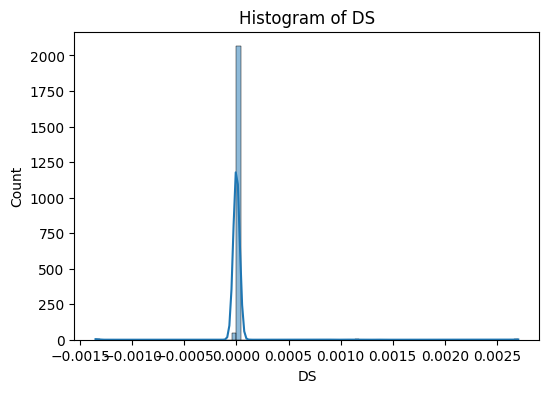

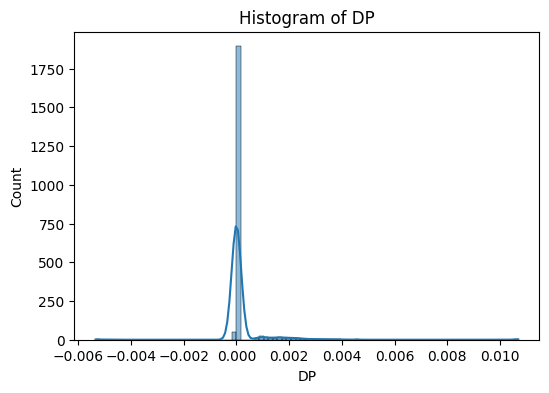

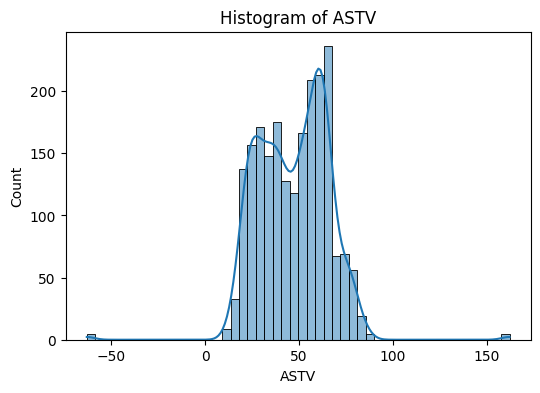

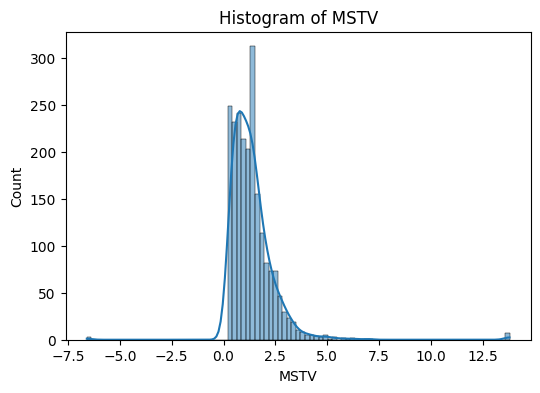

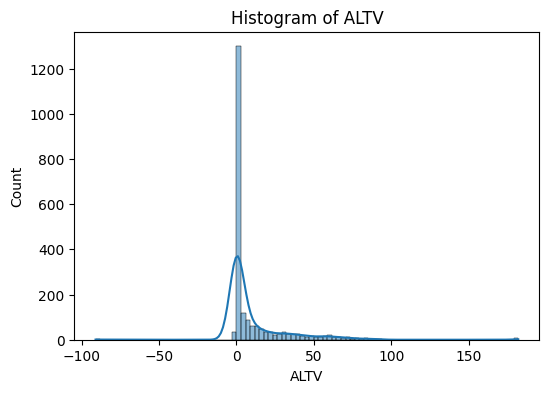

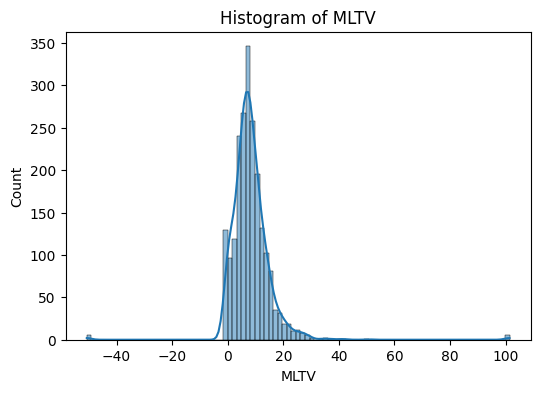

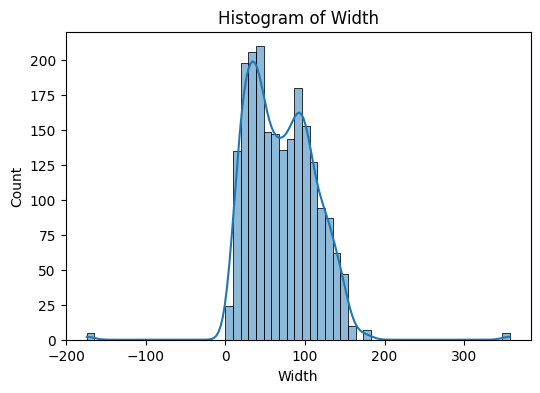

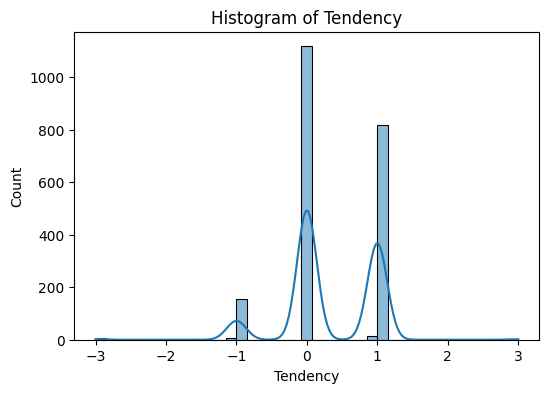

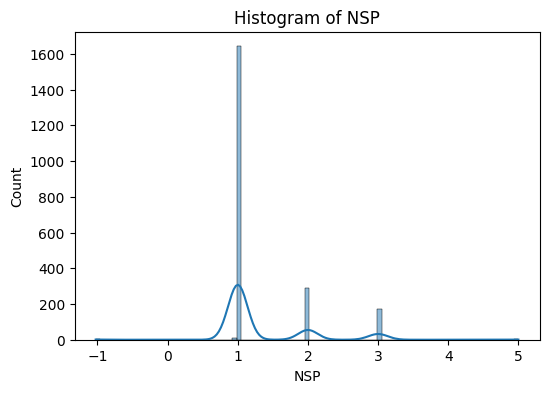

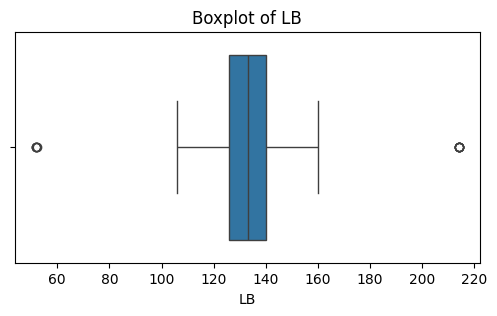

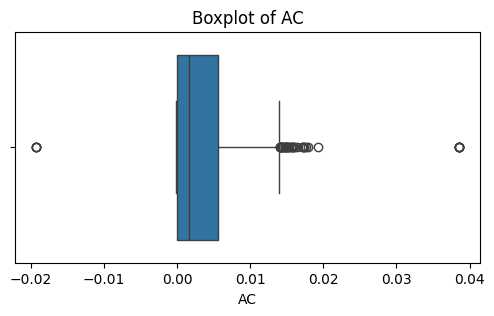

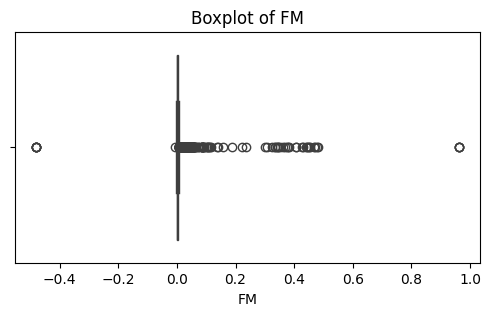

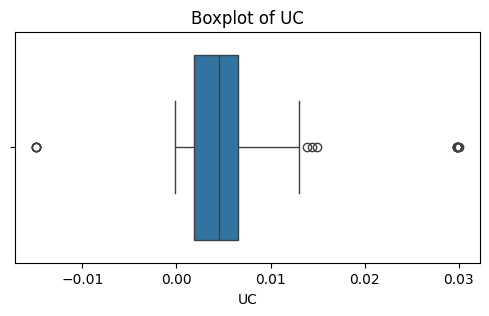

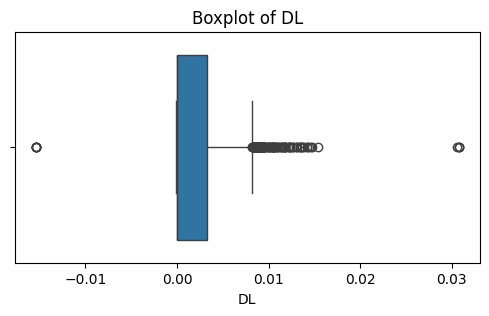

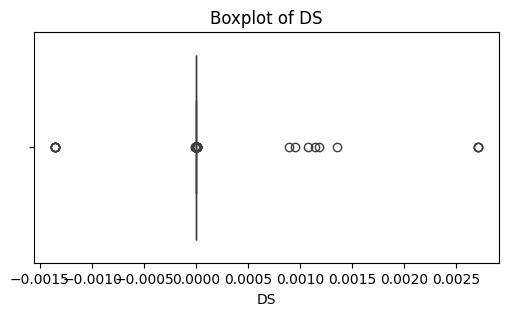

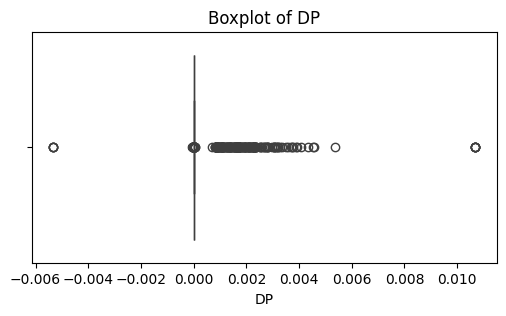

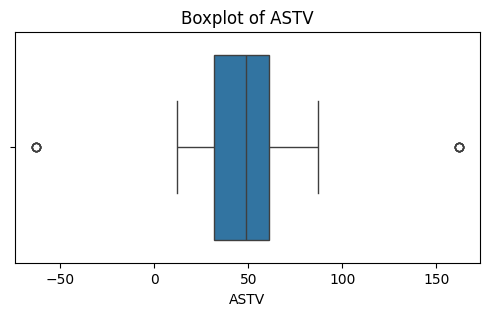

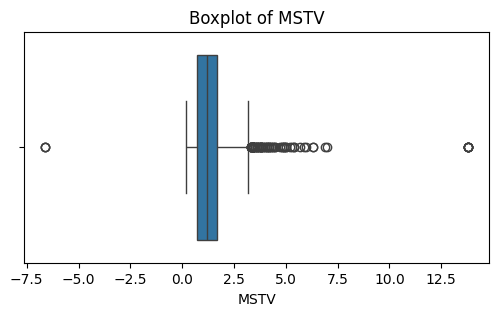

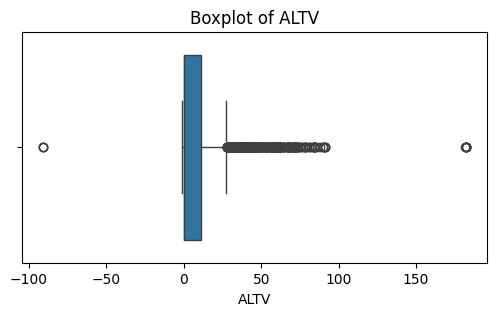

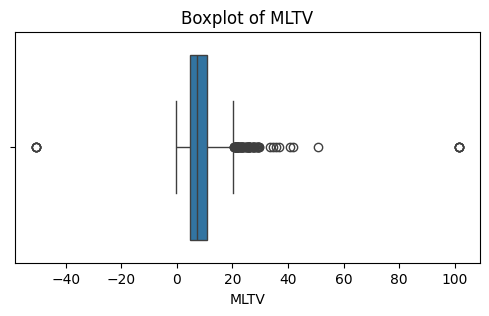

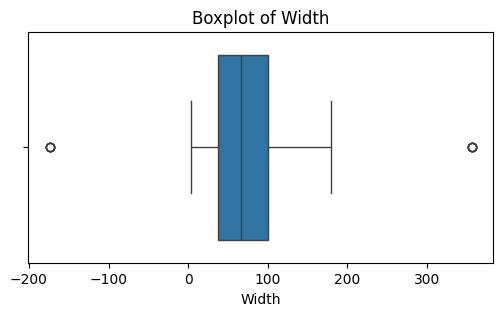

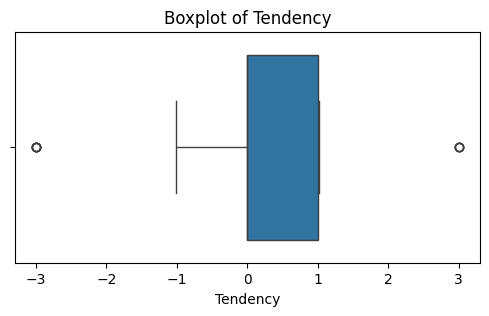

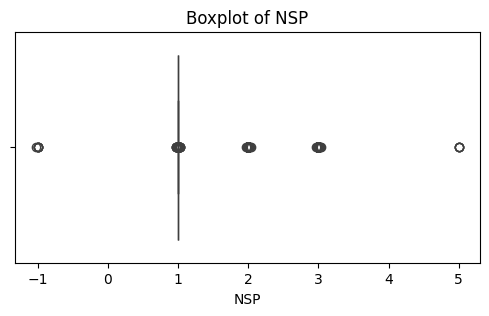

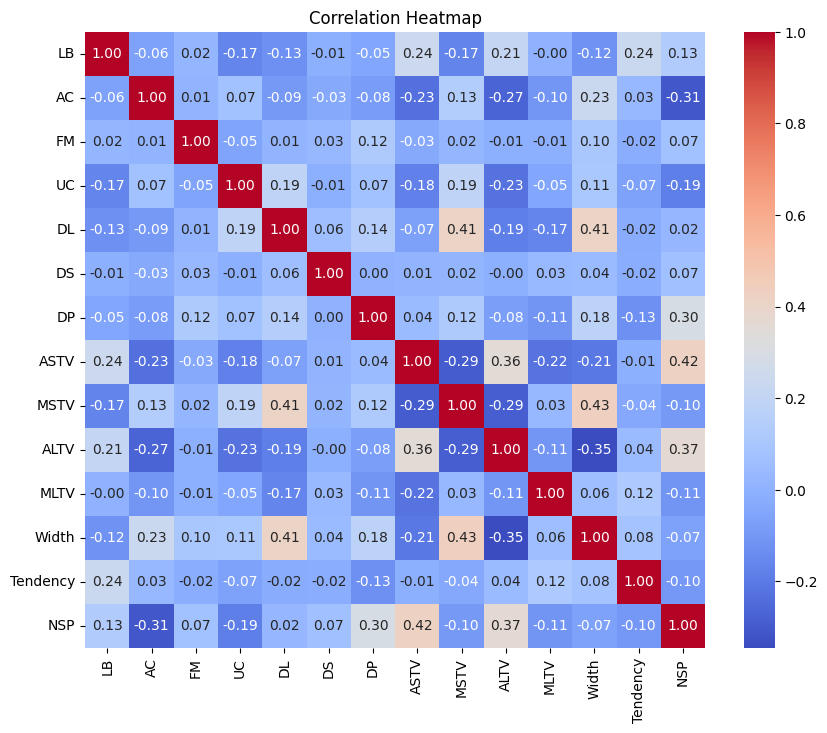

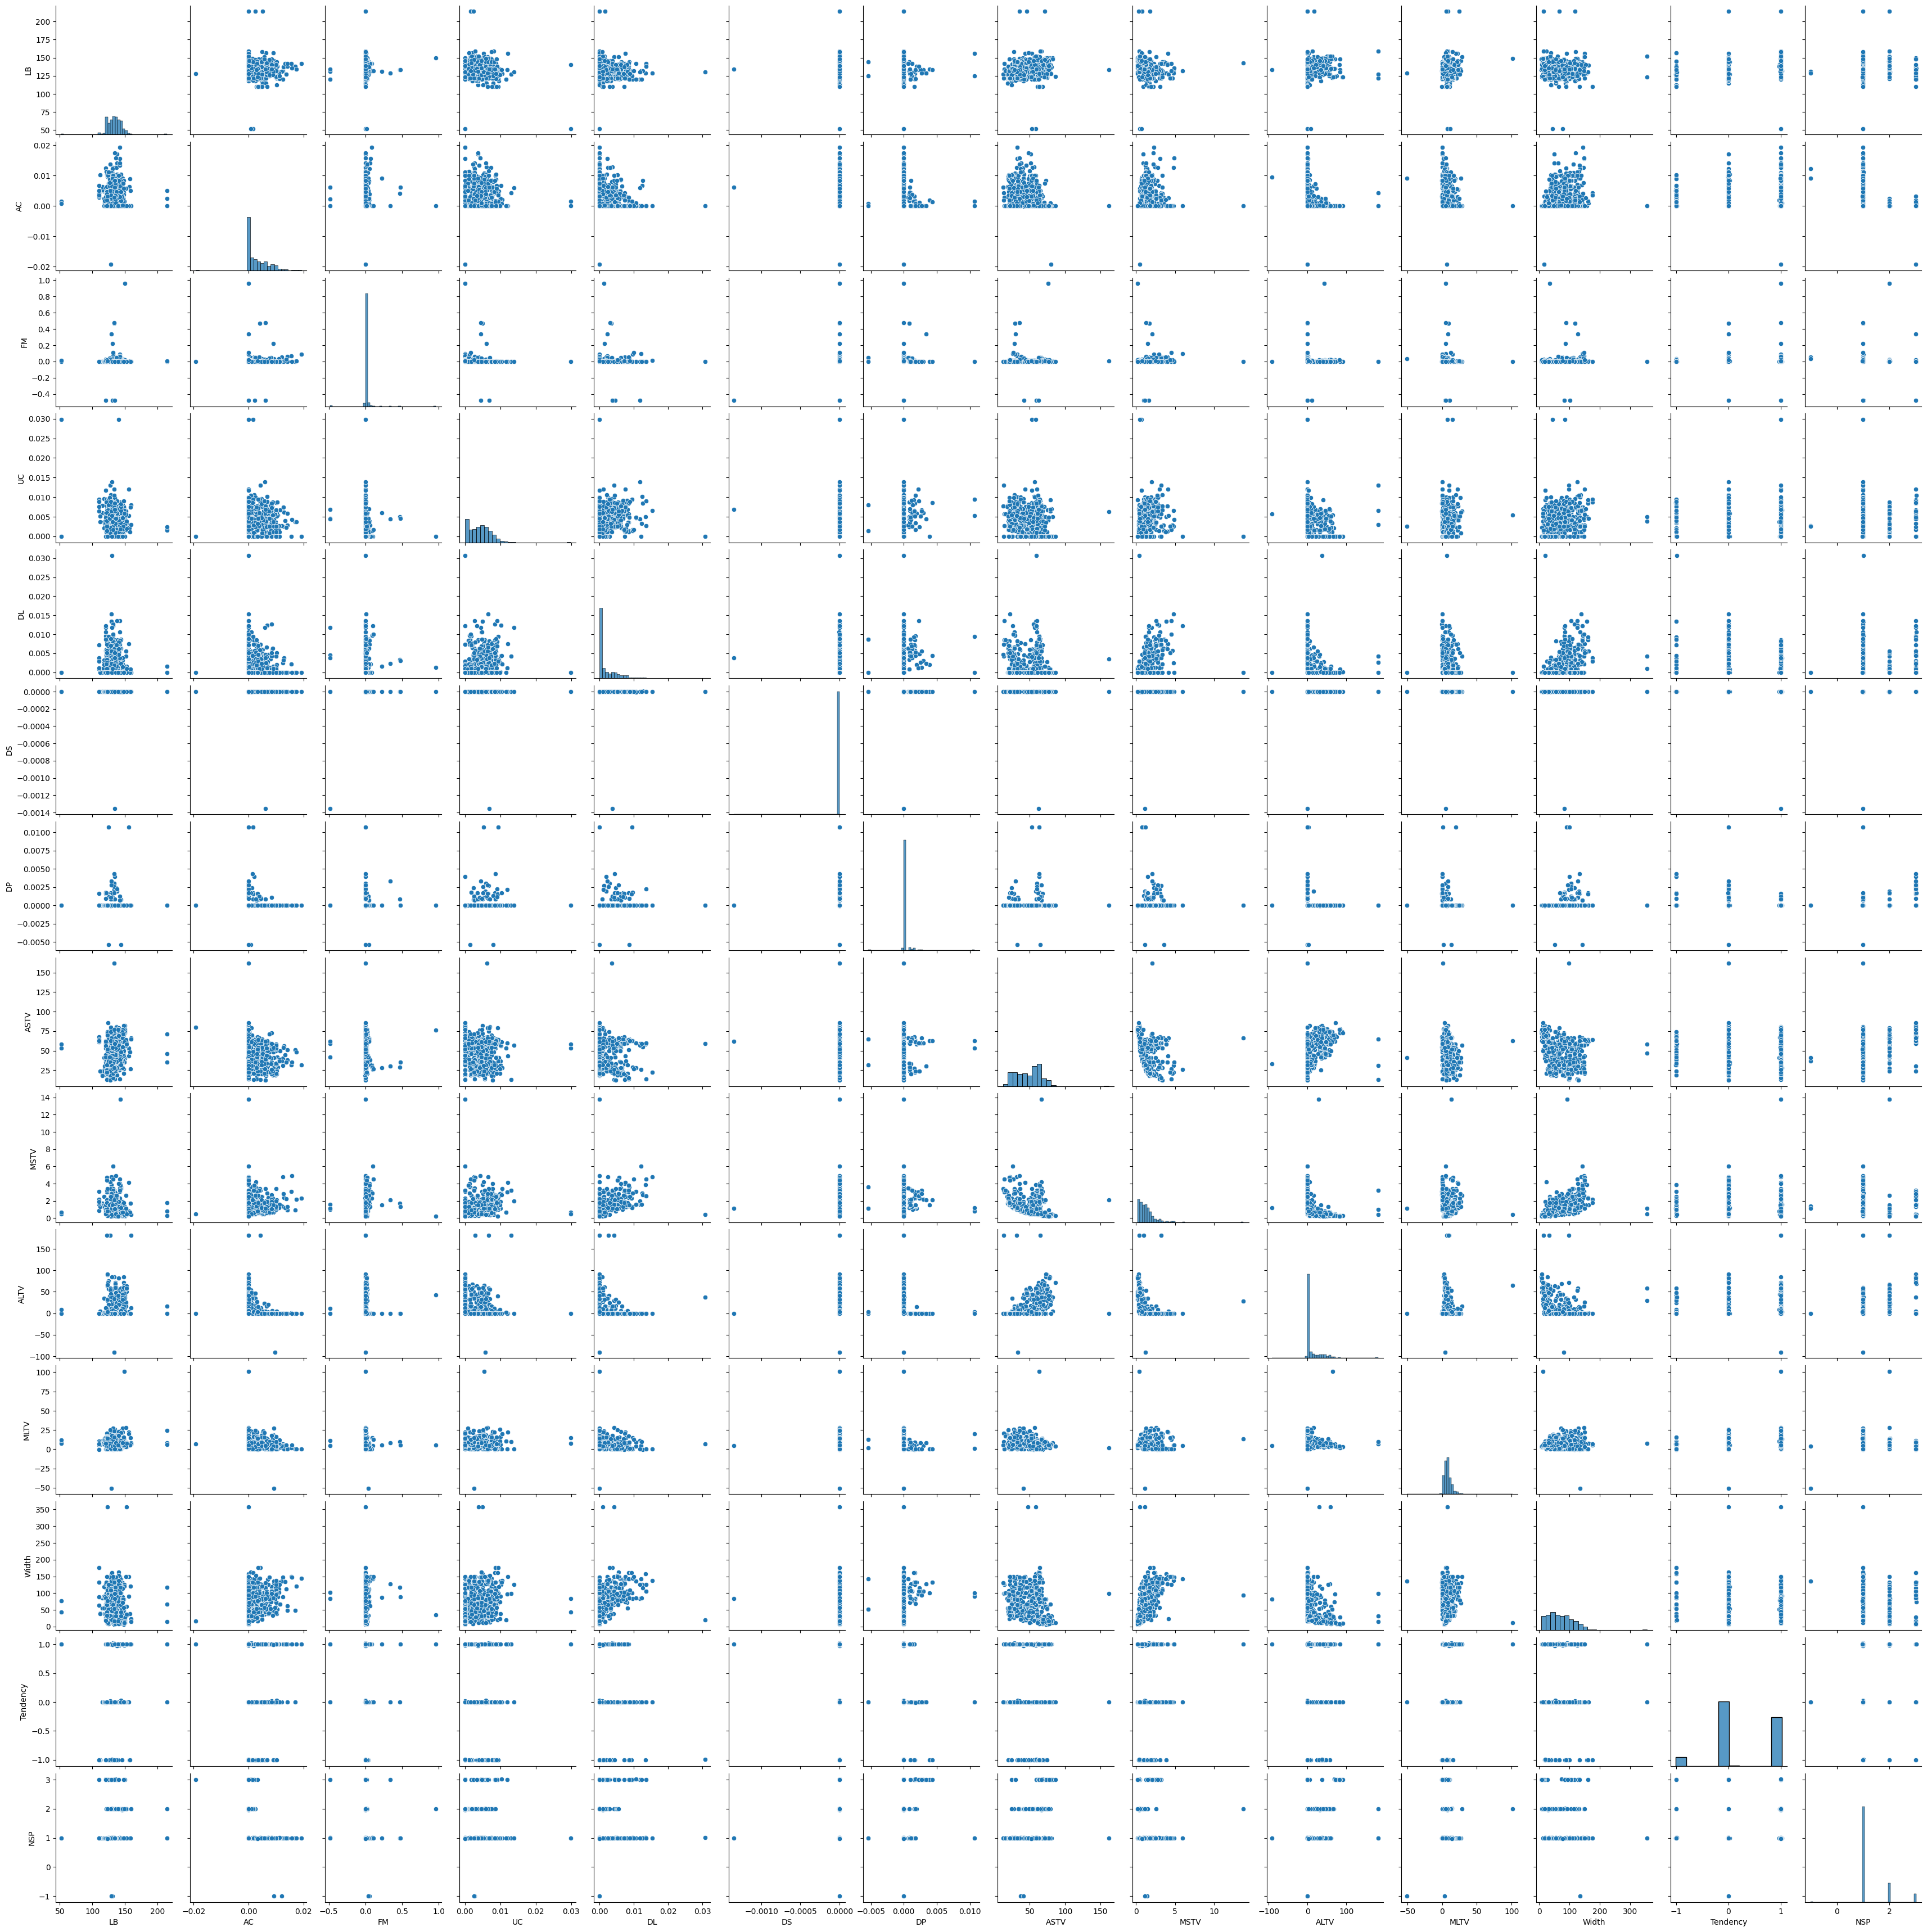

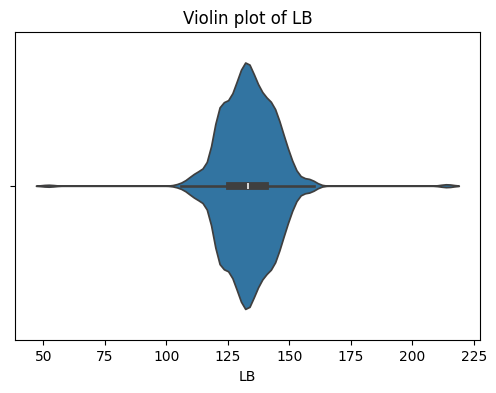

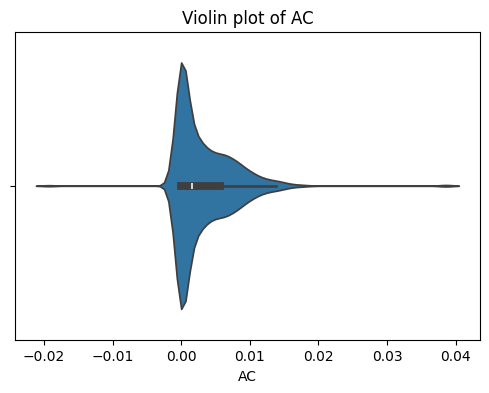

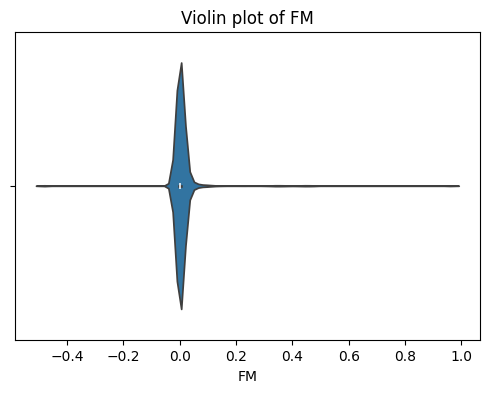

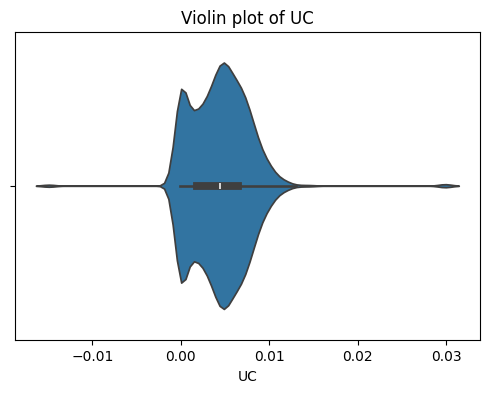

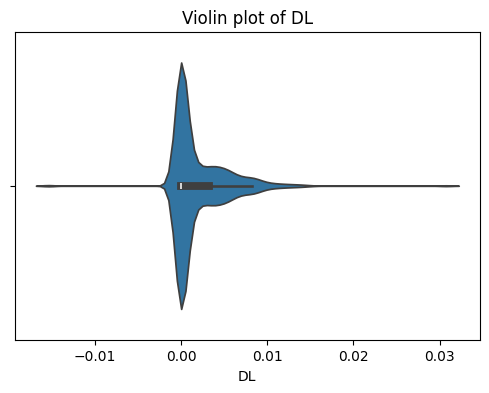

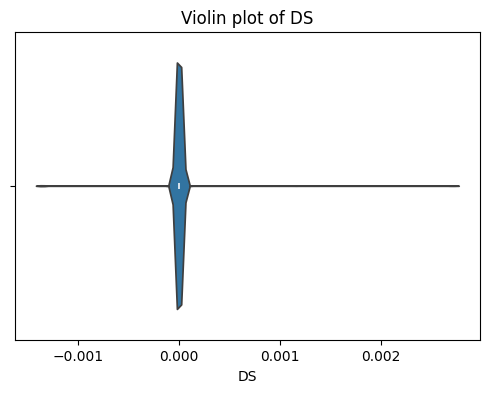

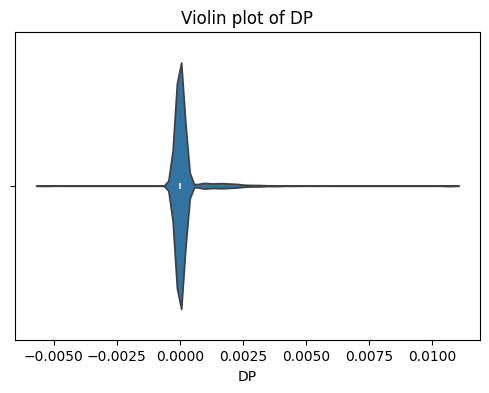

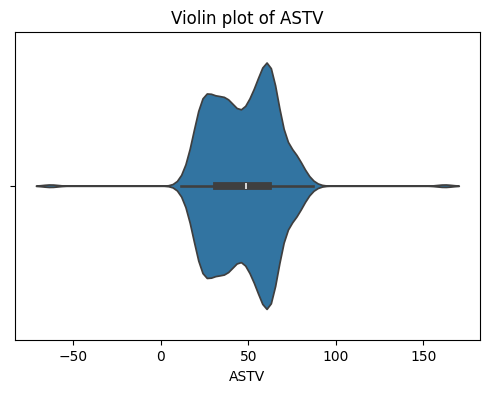

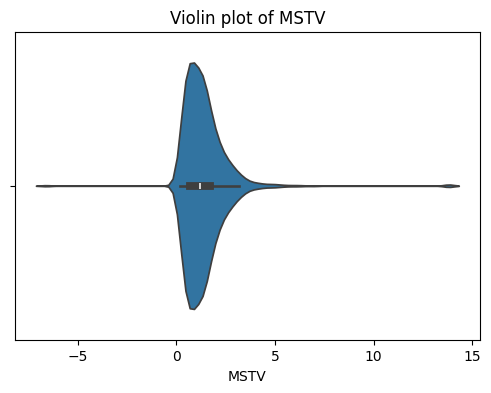

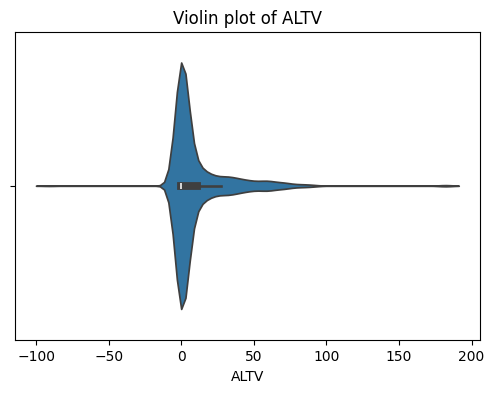

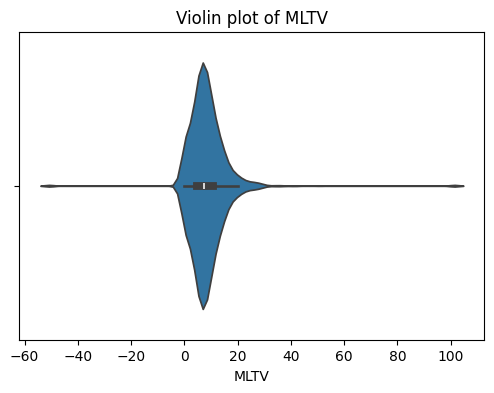

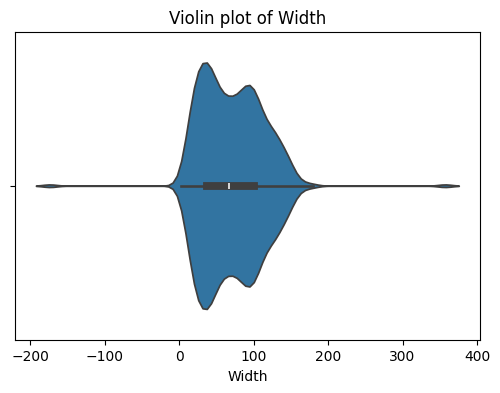

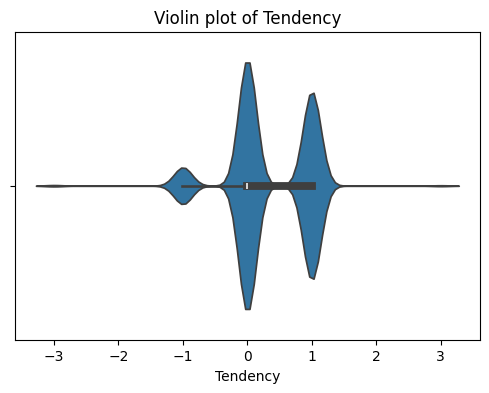

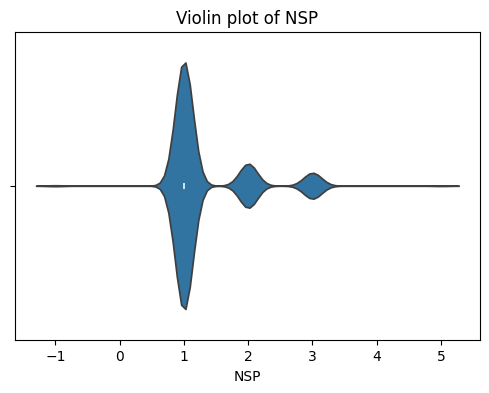

In [38]:
#Step 3: Visualizations

#Histograms
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

#Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#Correlation Heatmap
corr=df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Pairplot sample
sample_df=df[numeric_cols].sample(min(500,len(df)),random_state=42)
sns.pairplot(sample_df)
plt.show()

#Violin plots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x=df[col])
    plt.title(f'Violin plot of {col}')
    plt.show()

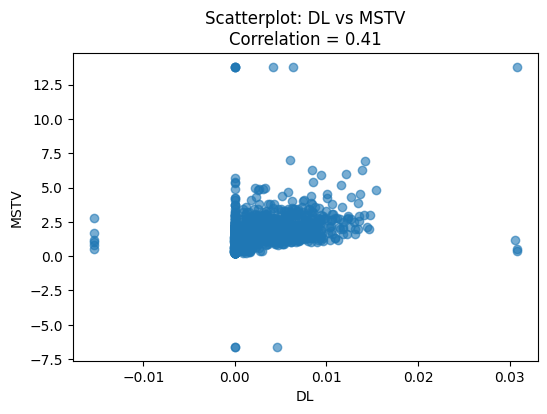

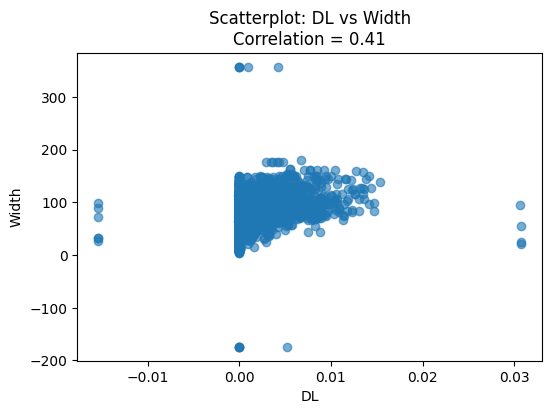

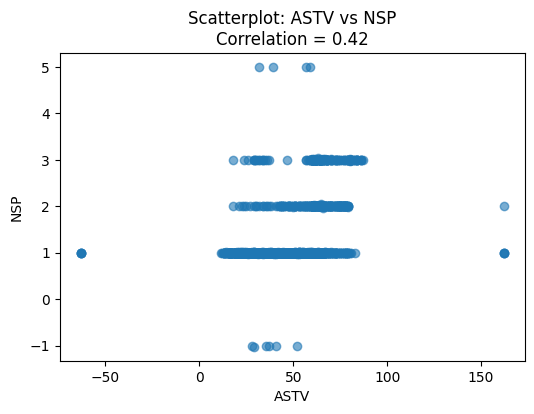

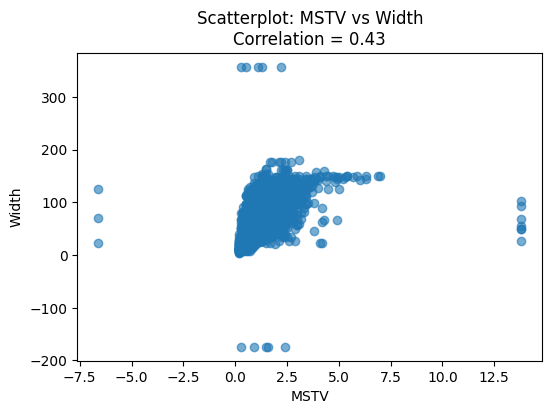

In [39]:
#Scatterplots for strongly correlated pairs

#1.Get correlation values (absolute so negatives don't matter)
%matplotlib inline 
correlation_matrix=df.corr().abs()

#2.Create an empty list to store plotted pairs
plotted_pairs=[]

#3.Loop through the correlation matrix
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        # Skip same-variable comparisons
        if col1==col2:
            continue
        
        # Only plot if correlation >= 0.5
        if correlation_matrix.loc[col1, col2]>=0.4:
            
            # Avoid plotting the same pair twice (A vs B and B vs A)
            if (col2,col1) in plotted_pairs:
                continue
            
            # Mark this pair as plotted
            plotted_pairs.append((col1,col2))
            
            # Make the scatterplot
            plt.figure(figsize=(6,4))
            plt.scatter(df[col1], df[col2],alpha=0.6)  # simple matplotlib scatter
            plt.title(f"Scatterplot: {col1} vs {col2}\nCorrelation = {correlation_matrix.loc[col1, col2]:.2f}")
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()


In [40]:
#Step 4:Pattern Recognition
#Check correlations between variables and detect outliers

#1.Correlation Analysis
correlation_matrix=df.corr()

#Store unique pairs of correlations in a list
pairs=[]
checked=set()

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1!=col2:
            pair=tuple(sorted([col1,col2]))
            if pair not in checked:
                checked.add(pair)
                corr_value=correlation_matrix.loc[col1,col2]
                pairs.append((col1,col2,corr_value))

#Sort by correlation values
pairs_sorted=sorted(pairs,key=lambda x: x[2],reverse=True)

In [41]:
#Print top 10 positive correlations
print("Top 10 Positive Correlations:")
for col1,col2,val in pairs_sorted[:10]:
    print(f"{col1} vs {col2}: {val:.2f}")

Top 10 Positive Correlations:
MSTV vs Width: 0.43
ASTV vs NSP: 0.42
DL vs MSTV: 0.41
DL vs Width: 0.41
ALTV vs NSP: 0.37
ASTV vs ALTV: 0.36
DP vs NSP: 0.30
LB vs ASTV: 0.24
LB vs Tendency: 0.24
AC vs Width: 0.23


In [42]:
#Print top 10 negative correlations
print("Top 10 Negative Correlations:")
for col1,col2,val in pairs_sorted[-10:]:
    print(f"{col1} vs {col2}: {val:.2f}")

Top 10 Negative Correlations:
DL vs ALTV: -0.19
ASTV vs Width: -0.21
ASTV vs MLTV: -0.22
UC vs ALTV: -0.23
AC vs ASTV: -0.23
AC vs ALTV: -0.27
MSTV vs ALTV: -0.29
ASTV vs MSTV: -0.29
AC vs NSP: -0.31
ALTV vs Width: -0.35


In [43]:
#2.Outlier Detection using Z-scores
from scipy import stats
import numpy as np
import pandas as pd

#Calculate z-scores for numeric columns
z_scores=stats.zscore(df[numeric_cols],nan_policy='omit')

#Convert into DataFrame for readability
z_scores_df=pd.DataFrame(np.abs(z_scores),columns=numeric_cols)

#Count how many rows have at least one z-score > 3
outliers=(z_scores_df > 3).any(axis=1).sum()

print(f"Number of rows with extreme z-scores (>3): {outliers}")

Number of rows with extreme z-scores (>3): 257


In [44]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

--- Feature differences across NSP groups(Normal=1,Suspect=2,Pathologic=3) ---


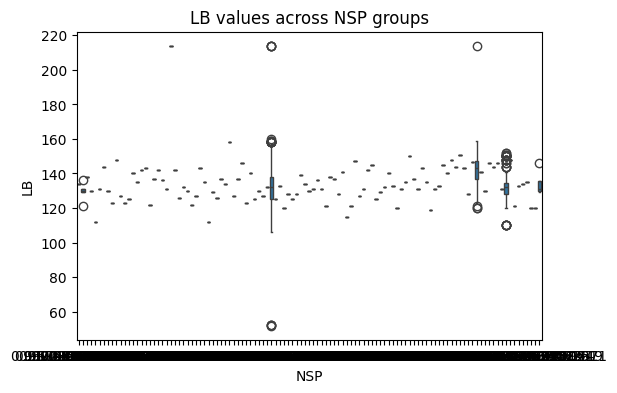

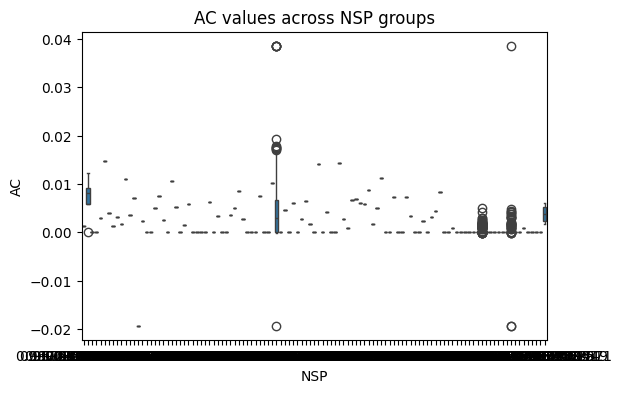

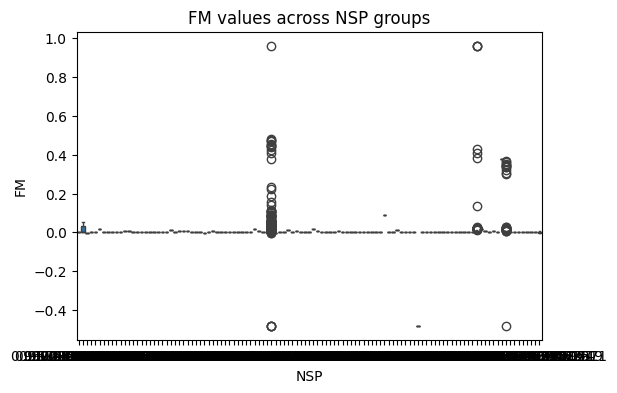

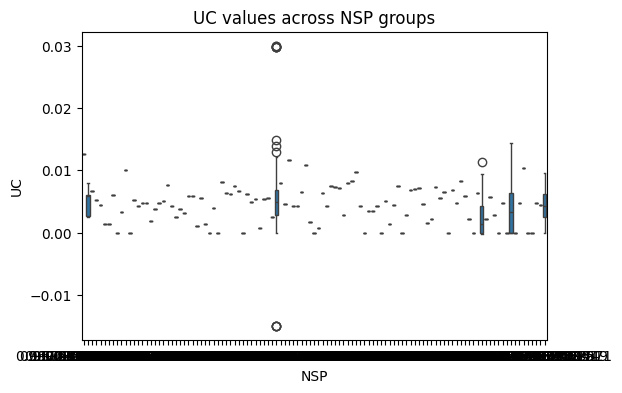

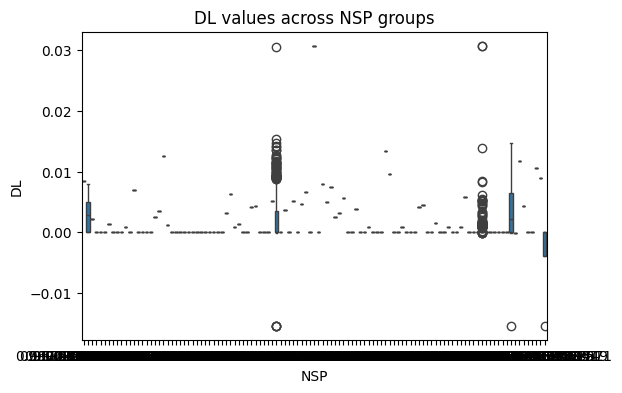

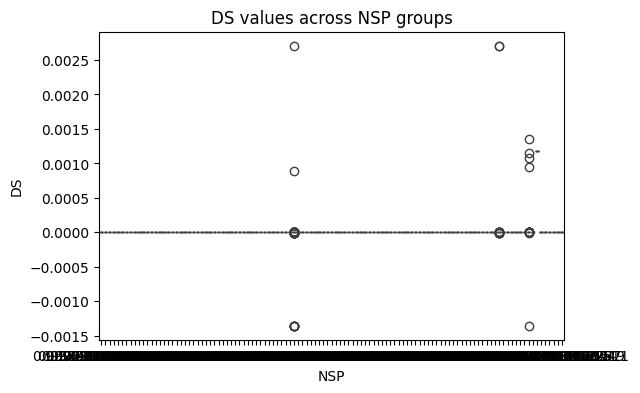

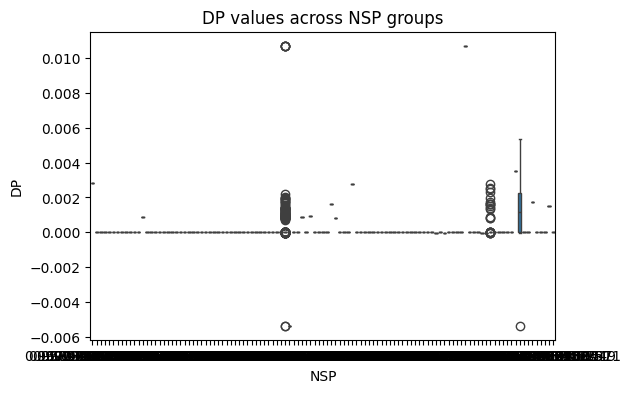

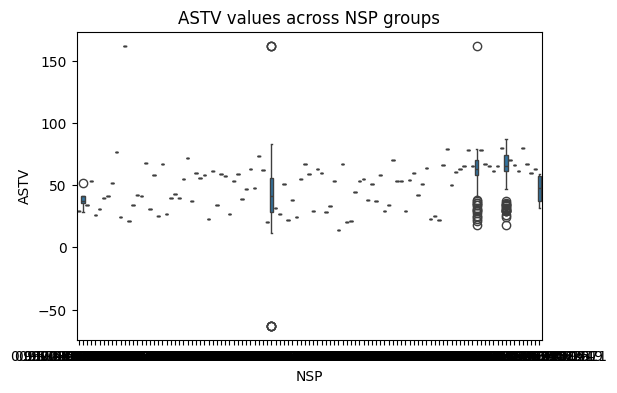

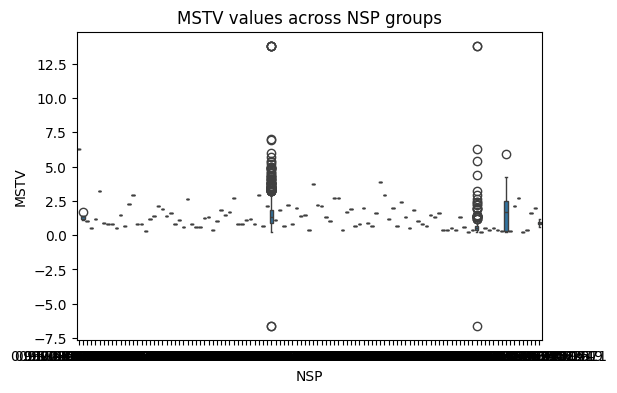

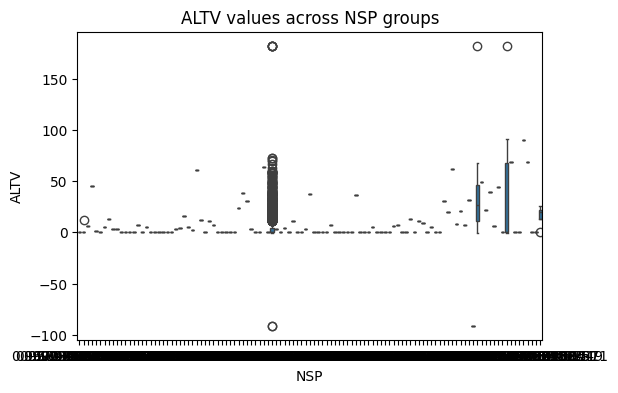

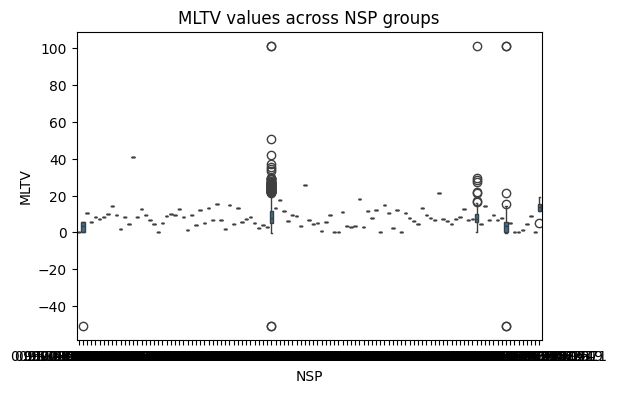

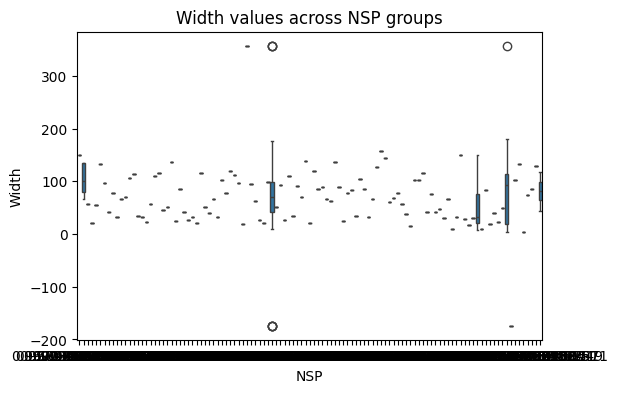

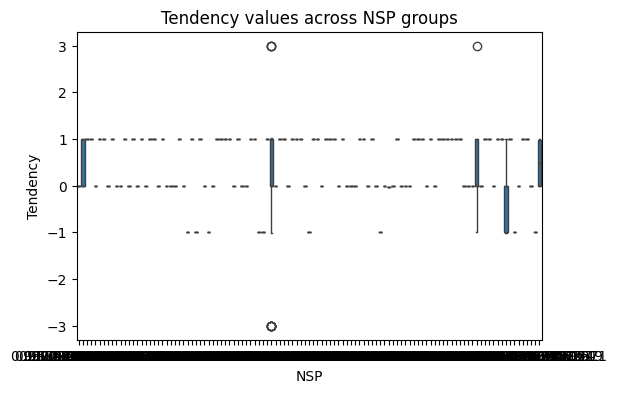

In [45]:
#Analysis: Feature patterns by NSP 
print("--- Feature differences across NSP groups(Normal=1,Suspect=2,Pathologic=3) ---")
for col in numeric_cols:
    if col!="NSP":
        plt.figure(figsize=(6,4))
        sns.boxplot(x="NSP",y=col,data=df)
        plt.title(f"{col} values across NSP groups")
        plt.show()

In [46]:
#Clustering to see hidden groups and patterns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Scale features (excluding NSP since it's a label)
X_scaled=StandardScaler().fit_transform(df[numeric_cols].drop(columns=["NSP"], errors="ignore"))

In [47]:
#Apply PCA for visualization(2D)
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_scaled)

**Why PCA?**
* The dataset has many features (14 columns), which makes it hard to visualize patterns directly.
* PCA reduces the data into 2 principal components while keeping most of the variance.
* This way, we can plot the data in 2D and see if groups or clusters appear more clearly.
* It doesn't change the data for analysis, it's just for easier visualization.


In [48]:
#Apply KMeans clustering
kmeans=KMeans(n_clusters=3,random_state=42)
clusters=kmeans.fit_predict(X_scaled)

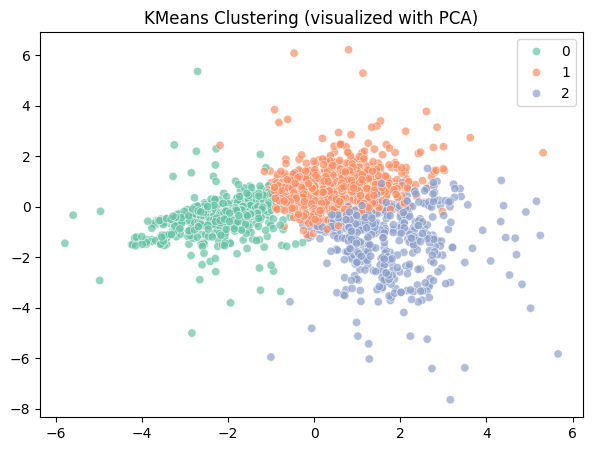

In [49]:
#Plot PCA with clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=clusters,palette="Set2",alpha=0.7)
plt.title("KMeans Clustering (visualized with PCA)")
plt.show()

In [50]:
print("Clustering Insight:")
print("-The KMeans model formed 3 groups.")
print("-These match the 3 NSP categories(Normal,Suspect,Pathologic).")

Clustering Insight:
-The KMeans model formed 3 groups.
-These match the 3 NSP categories(Normal,Suspect,Pathologic).


#### Deeper Insights based on Patterns Observed

1. **ASTV and MLTV**  
   These two are strongly correlated. When short-term variability (ASTV) increases, long-term variability (MLTV) also increases.  

2. **DL vs. NSP (Target Class)**  
   Pathologic cases have higher decelerations (DL) compared to Normal. This makes DL an important sign of abnormal states.  

3. **Histogram/Boxplot Trends**  
   Features like ASTV, ALTV, and DL vary more in Suspect/Pathologic cases, while Normal cases show tighter values.  

4. **Heatmap Findings**  
   DS and DP show strong positive correlation with Width, meaning Width is influenced by many measures.  

5. **Cluster Formation (PCA)**  
   PCA plots show 3 clusters that align with NSP classes (Normal, Suspect, Pathologic), proving natural group separation.  

6. **Outliers**  
   DL and DS have some extreme values. These may represent rare but serious abnormal cases.  

7. **Trends Across Classes**  
   - Normal: low DL, low ASTV, narrow Width  
   - Suspect: medium values  
   - Pathologic: high DL, high ASTV, wide Width  

8. **Key Features**  
   ASTV, DL, and Width appear important and could be used for building predictive models.  


In [51]:
#Conclusion
print("--- Conclusion ---")
print("1. Strong correlations were found between some variables(e.g.,ASTV and MLTV).")
print("2. NSP groups show clear differences in features like ASTV, MLTV, and Width.")
print("3. Clustering also grouped data into 3 clusters, which aligns with NSP classes.")
print("Overall, these insights suggest that certain features are useful to distinguish Normal,Suspect, and Pathologic cases, which could help in medical decision-making or further analysis.")

--- Conclusion ---
1. Strong correlations were found between some variables(e.g.,ASTV and MLTV).
2. NSP groups show clear differences in features like ASTV, MLTV, and Width.
3. Clustering also grouped data into 3 clusters, which aligns with NSP classes.
Overall, these insights suggest that certain features are useful to distinguish Normal,Suspect, and Pathologic cases, which could help in medical decision-making or further analysis.


# Step 6: Brief report

- The dataset was cleaned and missing values handled using median imputation.
- Statistical summaries revealed the central tendency and spread for each variable, with IQR values giving insights into variability.
- Visualizations (histograms, boxplots, violin plots) showed distributions and potential outliers.
- Correlation heatmap and scatterplots highlighted relationships among variables, with some strong positive/negative correlations.
- Outlier detection via z-scores identified rows that require closer inspection.
- Later Kmeans was used to find clusters/groups and also using boxplots we found the deeper relationships between variables 
- The results were plotted and deeper insights were displayed.
- These insights can support better understanding of fetal health indicators and help guide further medical data analysis.